In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_dodge_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_void_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_sheep_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set d

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import warnings
import os
warnings.filterwarnings('ignore')

## Load Dataset

In [75]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        
print('Dataset is Loaded')

Dataset is Loaded


In [76]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [77]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [78]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [79]:
df['label'].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

## EDA

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   speech  5600 non-null   object
 1   label   5600 non-null   object
dtypes: object(2)
memory usage: 87.6+ KB


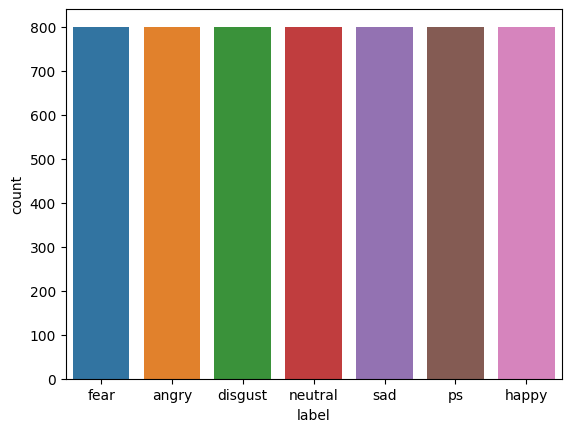

In [81]:
sns.countplot(x='label', data=df)
plt.show()

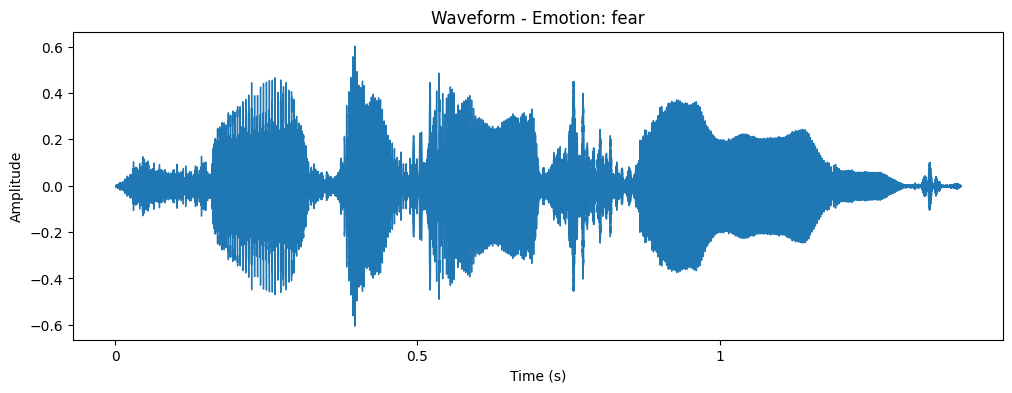

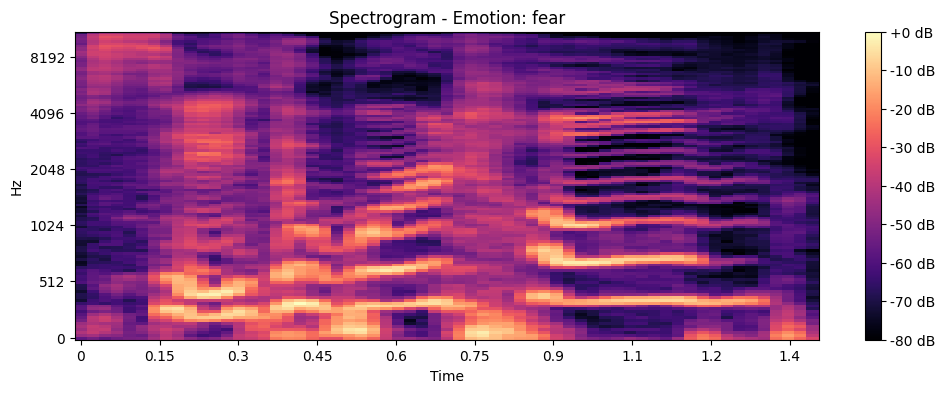

In [82]:
def plot_waveform(data, sampling_rate, emotion):
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.title(f'Waveform - Emotion: {emotion}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def plot_spectrogram(data, sampling_rate, emotion):
    plt.figure(figsize=(12, 4))
    S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - Emotion: {emotion}')
    plt.show()

emotion = 'fear'
path = df['speech'][df['label'] == emotion].iloc[0]  # Use .iloc[0] instead of [0] for better indexing
data, sampling_rate = librosa.load(path)

plot_waveform(data, sampling_rate, emotion)
plot_spectrogram(data, sampling_rate, emotion)
Audio(path)


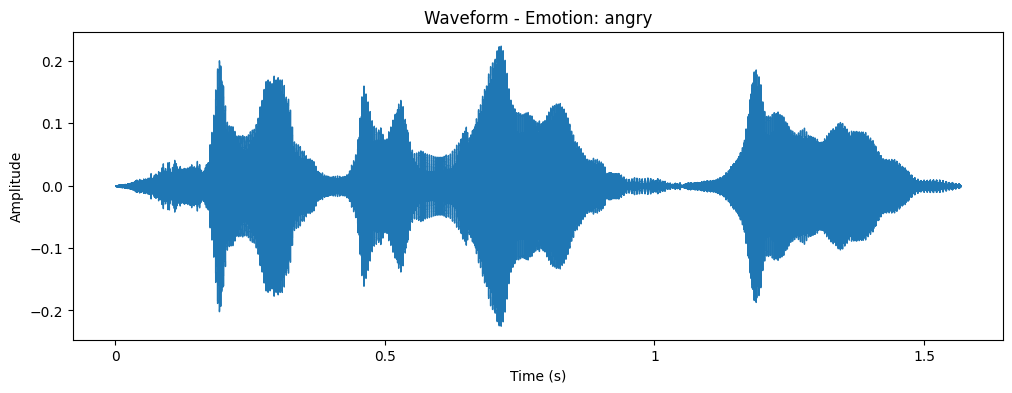

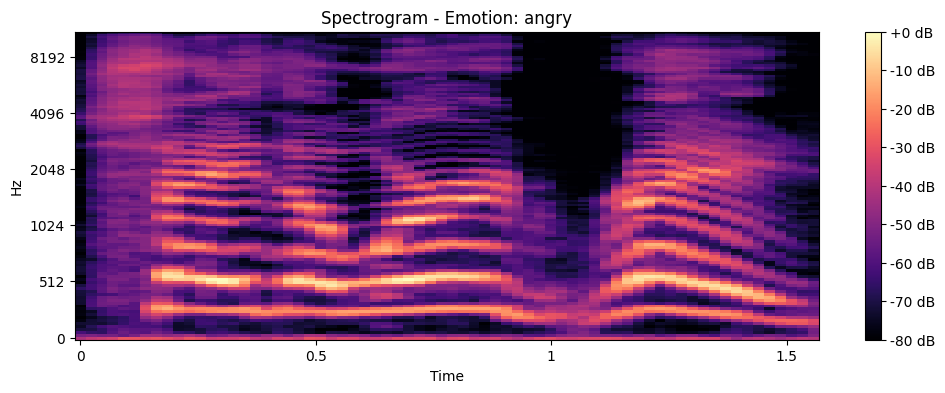

In [83]:
emotion = 'angry'
path = df['speech'][df['label'] == emotion].iloc[0]  # Use .iloc[0] instead of [0] for better indexing
data, sampling_rate = librosa.load(path)

plot_waveform(data, sampling_rate, emotion)
plot_spectrogram(data, sampling_rate, emotion)
Audio(path)


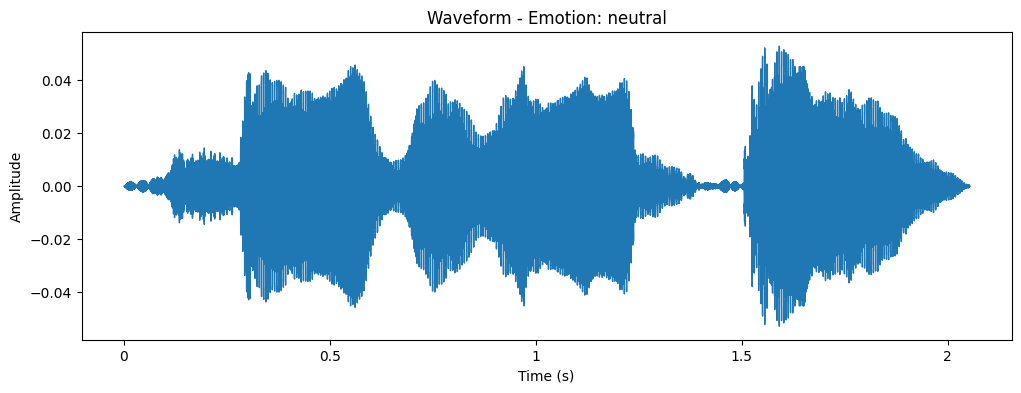

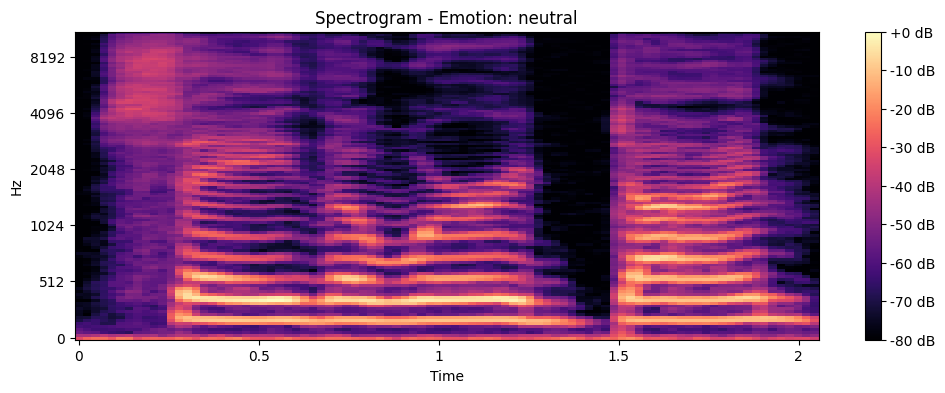

In [84]:
emotion = 'neutral'
path = df['speech'][df['label'] == emotion].iloc[1]  # Use .iloc[0] instead of [0] for better indexing
data, sampling_rate = librosa.load(path)

plot_waveform(data, sampling_rate, emotion)
plot_spectrogram(data, sampling_rate, emotion)
Audio(path)


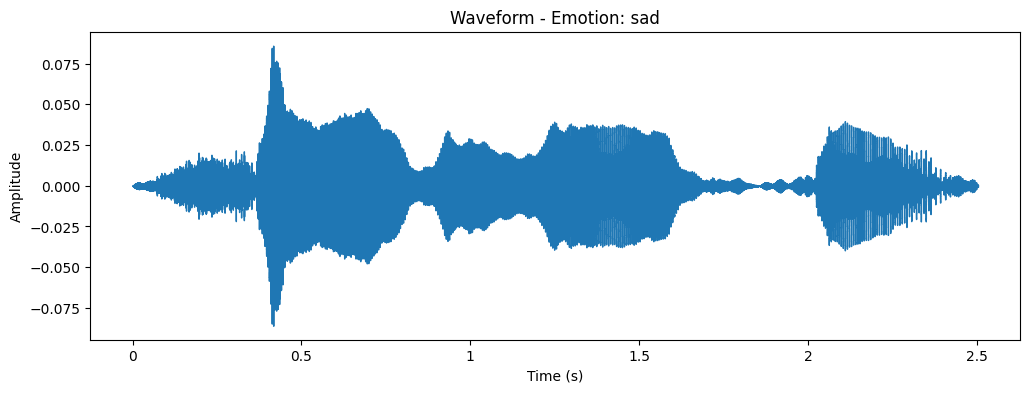

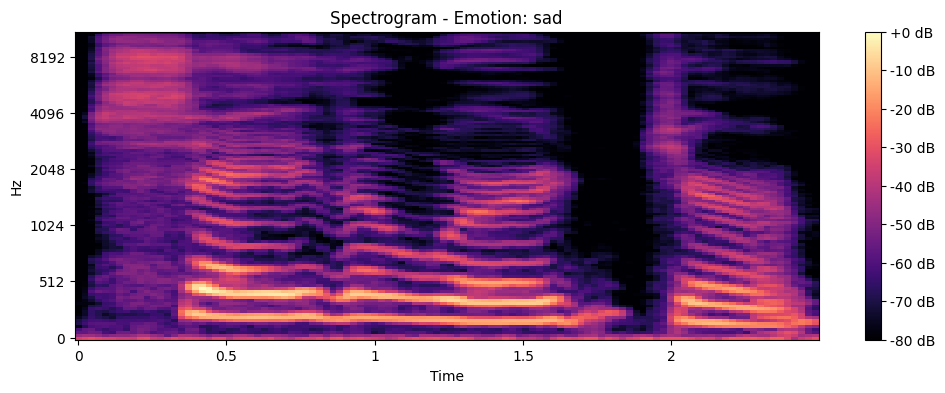

In [85]:
emotion = 'sad'
path = df['speech'][df['label'] == emotion].iloc[0]  # Use .iloc[0] instead of [0] for better indexing
data, sampling_rate = librosa.load(path)

plot_waveform(data, sampling_rate, emotion)
plot_spectrogram(data, sampling_rate, emotion)
Audio(path)


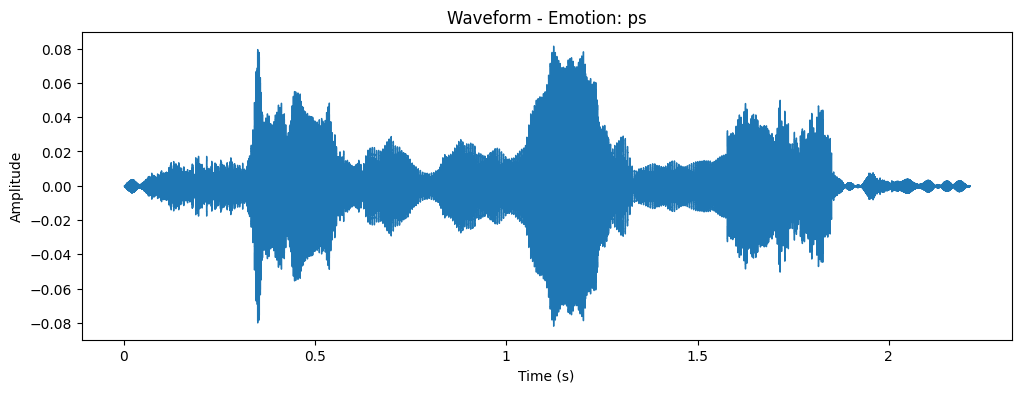

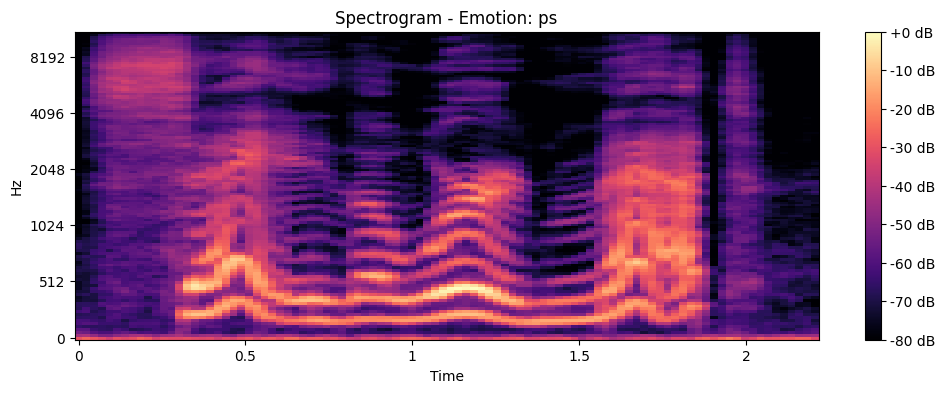

In [86]:
emotion = 'ps'
path = df['speech'][df['label'] == emotion].iloc[0]  # Use .iloc[0] instead of [0] for better indexing
data, sampling_rate = librosa.load(path)

plot_waveform(data, sampling_rate, emotion)
plot_spectrogram(data, sampling_rate, emotion)
Audio(path)


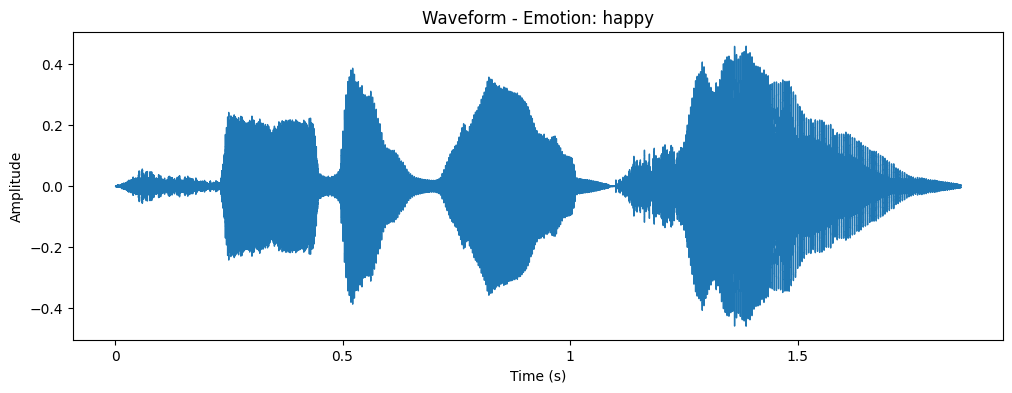

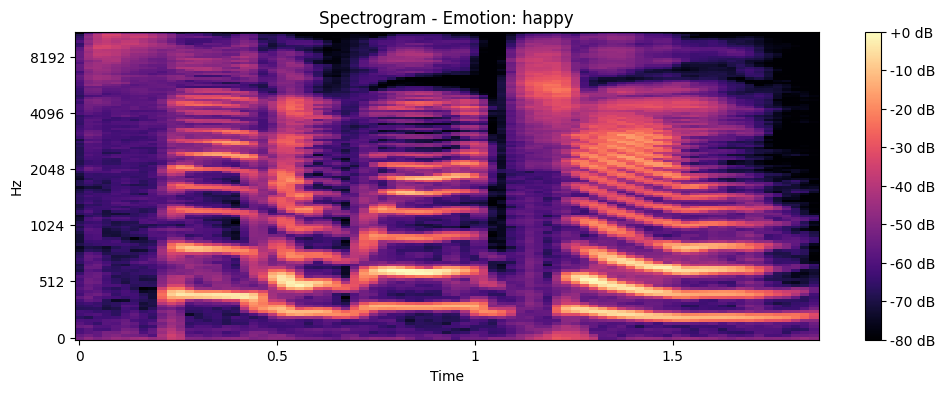

In [87]:
emotion = 'happy'
path = df['speech'][df['label'] == emotion].iloc[0]  # Use .iloc[0] instead of [0] for better indexing
data, sampling_rate = librosa.load(path)

plot_waveform(data, sampling_rate, emotion)
plot_spectrogram(data, sampling_rate, emotion)
Audio(path)


## Feature Extraction

In [88]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [89]:
extract_mfcc(df['speech'][0])

array([-285.7373    ,   85.78295   ,   -2.1689105 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.412452  ,   -3.0002632 ,
          1.0844971 ,   11.078272  ,  -17.419662  ,   -8.093215  ,
          6.5879736 ,   -4.220953  ,   -9.15508   ,    3.521479  ,
        -13.186381  ,   14.078853  ,   19.669733  ,   22.725618  ,
         32.574642  ,   16.325031  ,   -3.8427277 ,    0.89629626,
        -11.239262  ,    6.653462  ,   -2.5883691 ,   -7.7140174 ,
        -10.941658  ,   -2.4007556 ,   -5.2812862 ,    4.2711563 ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.8697433 ,
         -1.6027985 ,    2.5600505 ,   11.454375  ,   11.23345   ],
      dtype=float32)

In [90]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [91]:
X_mfcc

0       [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1       [-348.34332, 35.193233, -3.8413274, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.6343, 21.25971, -4.4110823, 6.4871554, -...
4       [-344.7548, 46.329193, -24.171415, 19.392921, ...
                              ...                        
5595    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
5596    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
5597    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.14743, 101.68391, -14.175895, -12.037377...
5599    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: speech, Length: 5600, dtype: object

In [92]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [93]:
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [100]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y = enc.fit_transform(df[['label']]).toarray()


In [101]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [102]:
y.shape

(5600, 7)

## Create the LSTM model

In [110]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(128, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 77127 (301.28 KB)
Trainable params: 7712

In [112]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs = 100, batch_size=512, shuffle=True)

Epoch 1/100
9/9 [==============================] - 8s 80ms/step - loss: 1.8118 - accuracy: 0.2658 - val_loss: 1.8004 - val_accuracy: 0.2696
Epoch 2/100
9/9 [==============================] - 0s 17ms/step - loss: 1.5396 - accuracy: 0.4453 - val_loss: 1.8271 - val_accuracy: 0.1759
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 1.2370 - accuracy: 0.5817 - val_loss: 1.7688 - val_accuracy: 0.1429
Epoch 4/100
9/9 [==============================] - 0s 14ms/step - loss: 0.8960 - accuracy: 0.7013 - val_loss: 1.3021 - val_accuracy: 0.3536
Epoch 5/100
9/9 [==============================] - 0s 14ms/step - loss: 0.6308 - accuracy: 0.7835 - val_loss: 1.0567 - val_accuracy: 0.4884
Epoch 6/100
9/9 [==============================] - 0s 13ms/step - loss: 0.4930 - accuracy: 0.8261 - val_loss: 0.6864 - val_accuracy: 0.7250
Epoch 7/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3927 - accuracy: 0.8569 - val_loss: 0.5735 - val_accuracy: 0.7643
Epoch 8/100
9/9 [===

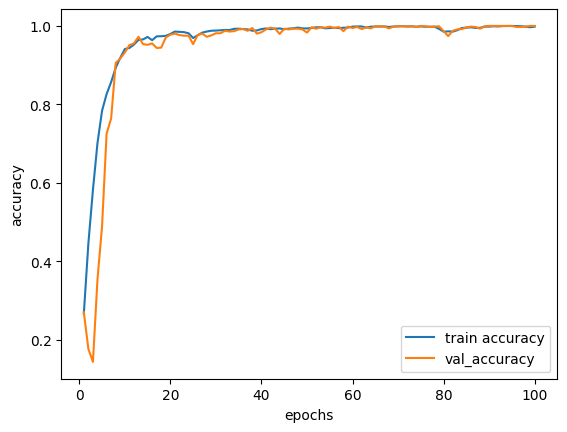

In [115]:
epochs = list(range(1, 101))  
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend() 
plt.show()


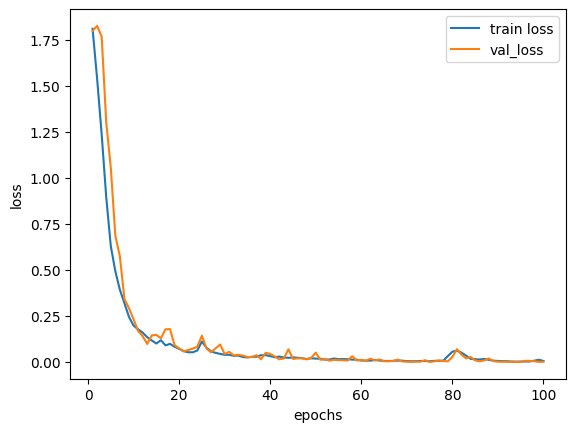

In [116]:
epochs = list(range(1, 101))  # Assuming you have 100 epochs
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [120]:
# Save the model to a file
model.save('model.h5')

from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('model.h5')